<a href="https://colab.research.google.com/github/AisAthania/Boston-Housing-data/blob/main/Individual_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [2]:
import findspark

In [3]:
findspark.init()

In [4]:
from pyspark.sql import SparkSession 

In [5]:

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [6]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

In [7]:
df = spark.read.csv("BostonHousing.csv", inferSchema=True, header = True)
df.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [10]:
from pyspark.ml.feature import VectorAssembler

from pyspark.ml.regression import LinearRegression

from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

In [16]:
only_features = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']

In [17]:
assembler = VectorAssembler(inputCols=only_features, outputCol= 'features')

In [18]:
feat_df = assembler.transform(df).select('features')

In [19]:
feat_df.show(10)

+--------------------+
|            features|
+--------------------+
|[0.00632,18.0,2.3...|
|[0.02731,0.0,7.07...|
|[0.02729,0.0,7.07...|
|[0.03237,0.0,2.18...|
|[0.06905,0.0,2.18...|
|[0.02985,0.0,2.18...|
|[0.08829,12.5,7.8...|
|[0.14455,12.5,7.8...|
|[0.21124,12.5,7.8...|
|[0.17004,12.5,7.8...|
+--------------------+
only showing top 10 rows



In [21]:
#standadize the data 

scaler = StandardScaler(
    inputCol = 'features',
    outputCol = 'scaledFeatures',
    withMean = True,
    withStd = True,
).fit(feat_df)

#when we transform the dataset feature will still remain in it
df_scaled = scaler.transform(feat_df)
df_scaled.show(10)

+--------------------+--------------------+
|            features|      scaledFeatures|
+--------------------+--------------------+
|[0.00632,18.0,2.3...|[-0.4193669292132...|
|[0.02731,0.0,7.07...|[-0.4169266699640...|
|[0.02729,0.0,7.07...|[-0.4169289951277...|
|[0.03237,0.0,2.18...|[-0.4163384035610...|
|[0.06905,0.0,2.18...|[-0.4120740534296...|
|[0.02985,0.0,2.18...|[-0.4166313741807...|
|[0.08829,12.5,7.8...|[-0.4098372459997...|
|[0.14455,12.5,7.8...|[-0.4032965606564...|
|[0.21124,12.5,7.8...|[-0.3955433024705...|
|[0.17004,12.5,7.8...|[-0.4003331395864...|
+--------------------+--------------------+
only showing top 10 rows



In [24]:
#fit PCA model
n_components = 2
pca = PCA(
    k= n_components,
    inputCol = 'scaledFeatures',
    outputCol = 'pcaFeatures'
).fit(df_scaled)

df_pca = pca.transform(df_scaled)
print("explained variance ratio", pca.explainedVariance.toArray())
df_pca.show(10)

explained variance ratio [0.47129606 0.11025193]
+--------------------+--------------------+--------------------+
|            features|      scaledFeatures|         pcaFeatures|
+--------------------+--------------------+--------------------+
|[0.00632,18.0,2.3...|[-0.4193669292132...|[2.09622303023858...|
|[0.02731,0.0,7.07...|[-0.4169266699640...|[1.45581098944742...|
|[0.02729,0.0,7.07...|[-0.4169289951277...|[2.07254655194818...|
|[0.03237,0.0,2.18...|[-0.4163384035610...|[2.60892175886434...|
|[0.06905,0.0,2.18...|[-0.4120740534296...|[2.45575477193107...|
|[0.02985,0.0,2.18...|[-0.4166313741807...|[2.21266184319277...|
|[0.08829,12.5,7.8...|[-0.4098372459997...|[1.35753765586535...|
|[0.14455,12.5,7.8...|[-0.4032965606564...|[0.84121214171331...|
|[0.21124,12.5,7.8...|[-0.3955433024705...|[0.17975039564828...|
|[0.17004,12.5,7.8...|[-0.4003331395864...|[1.07312213803569...|
+--------------------+--------------------+--------------------+
only showing top 10 rows



In [25]:
#collect data in Numpy Array
x_pca = df_pca.rdd.map(lambda row: row.pcaFeatures).collect()
x_pca = np.array(x_pca)

In [26]:
x_pca

array([[2.09622303, 0.77234843],
       [1.45581099, 0.59139995],
       [2.07254655, 0.59904658],
       ...,
       [0.31205166, 1.15410433],
       [0.27025162, 1.04033206],
       [0.12567884, 0.76122473]])

In [27]:
#convert array to dataframe 
df_pca = pd.DataFrame(x_pca, columns= ['PC1','PC2'])
df_pca.head()

,PC1,PC2
0,2.096223,0.772348
1,1.455811,0.591400
2,2.072547,0.599047
3,2.608922,-0.006864
4,2.455755,0.097615


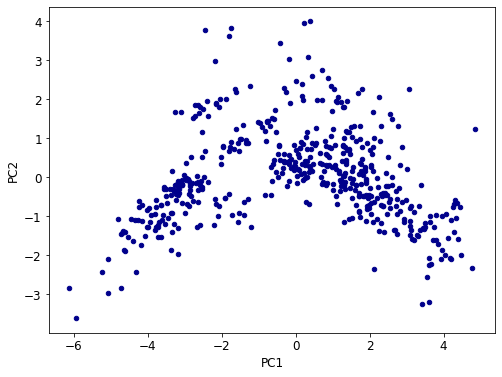

In [28]:
#plot two principal components 
plt.rcParams['figure.figsize'] = 8,6
plt.rcParams['font.size']= 12
ax1 = df_pca.plot.scatter(x='PC1', y='PC2', c='DarkBlue')

In [30]:

#linear regression using Pyspark
output = assembler.transform(df)

#input vs output 
finalized_data = output.select("features","medv")

finalized_data.show()

+--------------------+----+
|            features|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
|[0.02985,0.0,2.18...|28.7|
|[0.08829,12.5,7.8...|22.9|
|[0.14455,12.5,7.8...|27.1|
|[0.21124,12.5,7.8...|16.5|
|[0.17004,12.5,7.8...|18.9|
|[0.22489,12.5,7.8...|15.0|
|[0.11747,12.5,7.8...|18.9|
|[0.09378,12.5,7.8...|21.7|
|[0.62976,0.0,8.14...|20.4|
|[0.63796,0.0,8.14...|18.2|
|[0.62739,0.0,8.14...|19.9|
|[1.05393,0.0,8.14...|23.1|
|[0.7842,0.0,8.14,...|17.5|
|[0.80271,0.0,8.14...|20.2|
|[0.7258,0.0,8.14,...|18.2|
+--------------------+----+
only showing top 20 rows



In [31]:
#split the train and test data
train_data,test_data = finalized_data.randomSplit([0.8,0.2])

In [32]:
#train model
regressor = LinearRegression(featuresCol= 'features', labelCol= 'medv')

regressor = regressor.fit(train_data)

In [33]:
#print model cooeff and intercept
coeff = regressor.coefficients

intr = regressor.intercept

print("The coeeficient of the model is : %a" %coeff)
print("The intercept of the model is : %a" %intr)

The coeeficient of the model is : DenseVector([-0.1172, 0.035, 0.0059, 2.5836, -16.9998, 4.2564, -0.0068, -1.4301, 0.3136, -0.0116, -0.9923, 0.0085, -0.461])
The intercept of the model is : 33.878570654124054


In [34]:
#evaluate the model
pred = regressor.evaluate(test_data)
#predict the model
pred.predictions.show()

+--------------------+----+------------------+
|            features|medv|        prediction|
+--------------------+----+------------------+
|[0.00632,18.0,2.3...|24.0|29.862642948614987|
|[0.01311,90.0,1.2...|35.4|30.800654619416896|
|[0.0136,75.0,4.0,...|18.9|14.966921491931494|
|[0.01381,80.0,0.4...|50.0| 40.73584350651885|
|[0.01501,90.0,1.2...|50.0| 44.38067421813558|
|[0.01538,90.0,3.7...|44.0| 36.98399691784482|
|[0.02055,85.0,0.7...|24.7| 24.23570588730247|
|[0.02187,60.0,2.9...|31.1|31.960389982062516|
|[0.02498,0.0,1.89...|16.5|22.541342181661154|
|[0.02729,0.0,7.07...|34.7|30.661121625624393|
|[0.02985,0.0,2.18...|28.7|25.174495365724137|
|[0.03113,0.0,4.39...|17.5|16.841845937395803|
|[0.0315,95.0,1.47...|34.9|29.701613670861427|
|[0.03359,75.0,2.9...|34.9| 33.63247056065981|
|[0.03502,80.0,4.9...|28.5|32.628523675917926|
|[0.03548,80.0,3.6...|20.9|21.227820111021444|
|[0.03961,0.0,5.19...|21.1|  20.6729410682561|
|[0.04203,28.0,15....|22.9| 28.54243405547446|
|[0.04337,21.

In [36]:
#calaculate the model stats
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol = "medv", predictionCol="prediction", metricName = "rmse")

In [37]:
# root mean square
rmse = eval.evaluate(pred.predictions)
print("Rmse",rmse)

# mean square error
mse = eval.evaluate(pred.predictions, {eval.metricName : "mse"})
print("mse",mse)

#Mean absolute error
mae = eval.evaluate(pred.predictions, {eval.metricName : "mae"})
print("mae",mae)

#r2
r2 = eval.evaluate(pred.predictions, {eval.metricName : "r2"})
print("R2",r2)

Rmse 4.597549800542442
mse 21.137464168467847
mae 3.389898911364194
R2 0.7573585682556558
